
##### M13_Challenge_KonradK_venture_funding_with_deep_learning.ipynb
## Konrad Kozicki
### UCB-VIRT-FIN-PT-12-2020-U-B-TTH
# Module 13 Challenge Submission - Sandbox_1.32
## ( A35-39.h5 more `loss` and `[metrics]` Functions )

---

# Venture Funding with Deep Learning


In [1]:
# Imports
import pandas as pd
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import matplotlib.hvplot as plt

In [2]:
# Read the applicants_data.csv file from the Resources folder into a Pandas DataFrame
applicant_data_df = pd.read_csv(
    Path("./Resources/applicants_data.csv")
)

# # Review the DataFrame
# applicant_data_df.head()

In [3]:
# Review the data types associated with the columns
applicant_data_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

>>>> 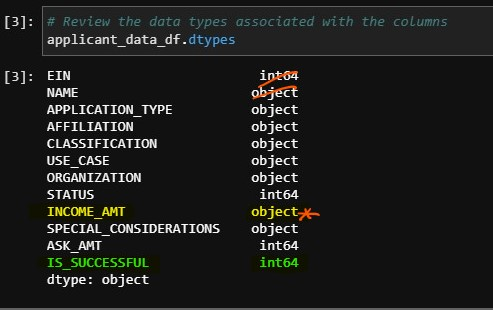

In [4]:
# Drop the 'EIN' and 'NAME' columns from the DataFrame
applicant_data_df = applicant_data_df.drop(columns = ["EIN", "NAME"])

# Review the DataFrame
applicant_data_df[:15]

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
5,T3,Independent,C1200,Preservation,Trust,1,0,N,5000,1
6,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,31452,1
7,T3,Independent,C2000,Preservation,Trust,1,10M-50M,N,7508025,1
8,T7,Independent,C1000,ProductDev,Trust,1,1-9999,N,94389,1
9,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0


In [5]:
# Drop the other columns from the DataFrame as needed
applicant_data_df_cropped = applicant_data_df.drop(columns = ["SPECIAL_CONSIDERATIONS"])


#.drop(columns = ["AFFILIATION", "APPLICATION_TYPE", "CLASSIFICATION", "ORGANIZATION", "INCOME_AMT", "ASK_AMT", "STATUS", "USE_CASE", "SPECIAL_CONSIDERATIONS"])

# # Review the DataFrame
applicant_data_df_cropped[:15]

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,142590,1
5,T3,Independent,C1200,Preservation,Trust,1,0,5000,1
6,T3,Independent,C1000,Preservation,Trust,1,100000-499999,31452,1
7,T3,Independent,C2000,Preservation,Trust,1,10M-50M,7508025,1
8,T7,Independent,C1000,ProductDev,Trust,1,1-9999,94389,1
9,T5,CompanySponsored,C3000,ProductDev,Association,1,0,5000,0


In [6]:
# Create a list of categorical variables 
categorical_variables_cropped = list(applicant_data_df_cropped.dtypes[applicant_data_df_cropped.dtypes == "object"].index)

# Display the categorical variables list
categorical_variables_cropped

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [7]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

In [8]:
# Encode the categorcal variables using OneHotEncoder
encoded_data = enc.fit_transform(applicant_data_df_cropped[categorical_variables_cropped])

In [9]:
# Create a DataFrame with the encoded variables
encoded_df = pd.DataFrame(
    encoded_data,
    columns = enc.get_feature_names(categorical_variables_cropped)
)

# # Review the DataFrame
# encoded_df.head()

In [10]:
numerical_variables_df = applicant_data_df_cropped.drop(columns = categorical_variables_cropped
                                                       )

# # Review the DataFrame
# numerical_variables_df.head()

In [11]:
# Add the numerical variables from the original DataFrame to the one-hot encoding DataFrame
fully_encoded_df = pd.concat(
    [
        numerical_variables_df,
        encoded_df
    ],
    axis=1
)

# # Review the Dataframe
# fully_encoded_df.head()

In [12]:
applicant_data_df_cropped.dtypes

APPLICATION_TYPE    object
AFFILIATION         object
CLASSIFICATION      object
USE_CASE            object
ORGANIZATION        object
STATUS               int64
INCOME_AMT          object
ASK_AMT              int64
IS_SUCCESSFUL        int64
dtype: object

In [13]:
fully_encoded_df.dtypes

STATUS                      int64
ASK_AMT                     int64
IS_SUCCESSFUL               int64
APPLICATION_TYPE_T10      float64
APPLICATION_TYPE_T12      float64
                           ...   
INCOME_AMT_10M-50M        float64
INCOME_AMT_1M-5M          float64
INCOME_AMT_25000-99999    float64
INCOME_AMT_50M+           float64
INCOME_AMT_5M-10M         float64
Length: 115, dtype: object

In [14]:
# Define the target set y using the IS_SUCCESSFUL column
y = fully_encoded_df["IS_SUCCESSFUL"]

# # Display a sample of y
# y[:5]

In [15]:
# Define features set X by selecting all columns but IS_SUCCESSFUL
X = fully_encoded_df.drop(columns=["IS_SUCCESSFUL"])


# # Review the features DataFrame
# X.head()

In [16]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [17]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

---

## Optimize the neural network model


### Step 1: Define at least three new deep neural network models (resulting in the original plus 3 optimization attempts). With each, try to improve on your first model’s predictive accuracy.

> **Rewind** Recall that perfect accuracy has a value of 1, so accuracy improves as its value moves closer to 1. To optimize your model for a predictive accuracy as close to 1 as possible, you can use any or all of the following techniques:
>
> * Adjust the input data by dropping different features columns to ensure that no variables or outliers confuse the model.
>
> * Add more neurons (nodes) to a hidden layer.
>
> * Add more hidden layers.
>
> * Use different activation functions for the hidden layers.
>
> * Add to or reduce the number of epochs in the training regimen.


# Alternative Model 10+

In [18]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])
# Review the number of features
number_input_features

114

In [19]:
# Define the number of neurons in the output layer
number_output_neurons_A10 = 1

In [20]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A10 =  (number_input_features + number_output_neurons_A10) // 2
# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A10

57

In [21]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A10 =  (hidden_nodes_layer1_A10 + number_output_neurons_A10) // 2
# Review the number of hidden nodes in the second layer
hidden_nodes_layer2_A10

29

In [22]:
# Define the number of hidden nodes for the third hidden layer
hidden_nodes_layer3_A10 =  (hidden_nodes_layer2_A10 + number_output_neurons_A10) // 2
# Review the number of hidden nodes in the third layer
hidden_nodes_layer3_A10

15

In [23]:
# Define the number of hidden nodes for the fourth hidden layer
hidden_nodes_layer4_A10 =  (hidden_nodes_layer3_A10 + number_output_neurons_A10) // 2
# Review the number of hidden nodes in the fourth layer
hidden_nodes_layer4_A10

8

In [24]:
# Define the number of hidden nodes for the fifth hidden layer
hidden_nodes_layer5_A10 =  (hidden_nodes_layer4_A10 + number_output_neurons_A10) // 2
# Review the number of hidden nodes in the fifth layer
hidden_nodes_layer5_A10

4

In [25]:
# Define the number of hidden nodes for the Sixth hidden layer
hidden_nodes_layer6_A10 =  (hidden_nodes_layer5_A10 + number_output_neurons_A10) // 2
# Review the number of hidden nodes in the sixth layer
hidden_nodes_layer6_A10

2

In [26]:
# Create and Display the Sequential Model Instance 
# for Model A10
nn_A10 = Sequential() 

# Add the first hidden layer
nn_A10.add(Dense(units=hidden_nodes_layer1_A10, input_dim=number_input_features, activation="relu"))
# Add the second hidden layer
nn_A10.add(Dense(units=hidden_nodes_layer2_A10, input_dim=number_input_features, activation="relu"))
# Add the third hidden layer
nn_A10.add(Dense(units=hidden_nodes_layer3_A10, input_dim=number_input_features, activation="relu"))
# Add the fourth hidden layer
nn_A10.add(Dense(units=hidden_nodes_layer4_A10, input_dim=number_input_features, activation="relu"))
# Add the fifth hidden layer
nn_A10.add(Dense(units=hidden_nodes_layer5_A10, input_dim=number_input_features, activation="relu"))
# Add the sixth hidden layer
nn_A10.add(Dense(units=hidden_nodes_layer6_A10, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_A10.add(Dense(units=number_output_neurons_A10, activation="sigmoid"))

# Display the Sequential model summary
nn_A10.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 57)                6555      
_________________________________________________________________
dense_1 (Dense)              (None, 29)                1682      
_________________________________________________________________
dense_2 (Dense)              (None, 15)                450       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 128       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 3

In [27]:
# Compile the Sequential model
nn_A10.compile(loss="mse", optimizer="adam", metrics=["accuracy"])

In [28]:
# Fit the model using 50 epochs and the training data
fit_model_A10 = nn_A10.fit(X_train_scaled, y_train, validation_split=0.3, epochs=100)

Epoch 1/100
563/563 [==============================] - 1s 2ms/step - loss: 0.2254 - accuracy: 0.6609 - val_loss: 0.1880 - val_accuracy: 0.7353
Epoch 2/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1889 - accuracy: 0.7279 - val_loss: 0.1842 - val_accuracy: 0.7378
Epoch 3/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1858 - accuracy: 0.7305 - val_loss: 0.1834 - val_accuracy: 0.7346
Epoch 4/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1839 - accuracy: 0.7323 - val_loss: 0.1838 - val_accuracy: 0.7363
Epoch 5/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1848 - accuracy: 0.7292 - val_loss: 0.1836 - val_accuracy: 0.7356
Epoch 6/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1836 - accuracy: 0.7327 - val_loss: 0.1839 - val_accuracy: 0.7343
Epoch 7/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1844 - accuracy: 0.7311 - val_loss: 0.1833 - val_accuracy: 0.7371

In [29]:
print("Alternative Model 10 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A10.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 10 Results
Loss: 0.18609440326690674, Accuracy: 0.7279300093650818


# Alternative Model 11+

In [30]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])
# Review the number of features
number_input_features

114

In [31]:
# Define the number of neurons in the output layer
number_output_neurons_A11 = 1

In [32]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A11 =  (number_input_features + number_output_neurons_A11) // 2
# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A11

57

In [33]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A11 =  (hidden_nodes_layer1_A11 + number_output_neurons_A11) // 2
hidden_nodes_layer2_A11 = hidden_nodes_layer1_A11

# Review the number of hidden nodes in the second layer
hidden_nodes_layer2_A11

57

In [34]:
# Define the number of hidden nodes for the third hidden layer
hidden_nodes_layer3_A11 =  (hidden_nodes_layer2_A11 + number_output_neurons_A11) // 2
# Review the number of hidden nodes in the third layer
hidden_nodes_layer3_A11

29

In [35]:
# Define the number of hidden nodes for the fourth hidden layer
hidden_nodes_layer4_A11 =  (hidden_nodes_layer3_A11 + number_output_neurons_A11) // 2
# Review the number of hidden nodes in the fourth layer
hidden_nodes_layer4_A11

15

In [36]:
# Define the number of hidden nodes for the fifth hidden layer
hidden_nodes_layer5_A11 =  (hidden_nodes_layer4_A11 + number_output_neurons_A11) // 2
# Review the number of hidden nodes in the fifth layer
hidden_nodes_layer5_A11

8

In [37]:
# Define the number of hidden nodes for the Sixth hidden layer
hidden_nodes_layer6_A11 = (hidden_nodes_layer5_A11 + number_output_neurons_A11) // 2
# Review the number of hidden nodes in the sixth layer
hidden_nodes_layer6_A11

4

In [38]:
# Create and Display the Sequential Model Instance 
# for Model A11
nn_A11 = Sequential() 

# Add the first hidden layer
nn_A11.add(Dense(units=hidden_nodes_layer1_A11, input_dim=number_input_features, activation="relu"))
# Add the second hidden layer
nn_A11.add(Dense(units=hidden_nodes_layer2_A11, input_dim=number_input_features, activation="relu"))
# Add the third hidden layer
nn_A11.add(Dense(units=hidden_nodes_layer3_A11, input_dim=number_input_features, activation="relu"))
# Add the fourth hidden layer
nn_A11.add(Dense(units=hidden_nodes_layer4_A11, input_dim=number_input_features, activation="relu"))
# Add the fifth hidden layer
nn_A11.add(Dense(units=hidden_nodes_layer5_A11, input_dim=number_input_features, activation="relu"))
# Add the sixth hidden layer
nn_A11.add(Dense(units=hidden_nodes_layer6_A11, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_A11.add(Dense(units=number_output_neurons_A11, activation="sigmoid"))

# Display the Sequential model summary
nn_A11.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 57)                6555      
_________________________________________________________________
dense_8 (Dense)              (None, 57)                3306      
_________________________________________________________________
dense_9 (Dense)              (None, 29)                1682      
_________________________________________________________________
dense_10 (Dense)             (None, 15)                450       
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 128       
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                

In [39]:
# Compile the Sequential model
nn_A11.compile(loss="mse", optimizer="adam", metrics=["mse"])

In [40]:
# Fit the model using 50 epochs and the training data
fit_model_A11 = nn_A11.fit(X_train_scaled, y_train, validation_split=0.3, epochs=100)

Epoch 1/100
563/563 [==============================] - 1s 1ms/step - loss: 0.2249 - mse: 0.2249 - val_loss: 0.1856 - val_mse: 0.1856
Epoch 2/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1872 - mse: 0.1872 - val_loss: 0.1835 - val_mse: 0.1835
Epoch 3/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1837 - mse: 0.1837 - val_loss: 0.1822 - val_mse: 0.1822
Epoch 4/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1847 - mse: 0.1847 - val_loss: 0.1828 - val_mse: 0.1828
Epoch 5/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1843 - mse: 0.1843 - val_loss: 0.1827 - val_mse: 0.1827
Epoch 6/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1841 - mse: 0.1841 - val_loss: 0.1835 - val_mse: 0.1835
Epoch 7/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1816 - mse: 0.1816 - val_loss: 0.1821 - val_mse: 0.1821
Epoch 8/100
563/563 [==============================] - 1s 1ms/step - 

In [41]:
print("Alternative Model 11 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A11.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 11 Results
Loss: 0.18793749809265137, Accuracy: 0.18793749809265137


# Alternative Model 12+

In [42]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])
# Review the number of features
number_input_features

114

In [43]:
# Define the number of neurons in the output layer
number_output_neurons_A12 = 1

In [44]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A12 =  (number_input_features + number_output_neurons_A12) // 2
# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A12

57

In [45]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A12 =  (hidden_nodes_layer1_A12 + number_output_neurons_A12) // 2
# Review the number of hidden nodes in the second layer
hidden_nodes_layer2_A12

29

In [46]:
# Define the number of hidden nodes for the third hidden layer
hidden_nodes_layer3_A12 =  (hidden_nodes_layer2_A12 + number_output_neurons_A12) // 2
# Review the number of hidden nodes in the third layer
hidden_nodes_layer3_A12

15

In [47]:
# Define the number of hidden nodes for the fourth hidden layer
hidden_nodes_layer4_A12 =  (hidden_nodes_layer3_A12 + number_output_neurons_A12) // 2
# Review the number of hidden nodes in the fourth layer
hidden_nodes_layer4_A12

8

In [48]:
# Define the number of hidden nodes for the fifth hidden layer
hidden_nodes_layer5_A12 =  (hidden_nodes_layer4_A12 + number_output_neurons_A12) // 2
# Review the number of hidden nodes in the fifth layer
hidden_nodes_layer5_A12

4

In [49]:
# Define the number of hidden nodes for the Sixth hidden layer
hidden_nodes_layer6_A12 =  (hidden_nodes_layer5_A12 + number_output_neurons_A12) // 2
# Review the number of hidden nodes in the sixth layer
hidden_nodes_layer6_A12

2

In [50]:
# Create and Display the Sequential Model Instance 
# for Model A12
nn_A12 = Sequential() 

# Add the first hidden layer
nn_A12.add(Dense(units=hidden_nodes_layer1_A12, input_dim=number_input_features, activation="relu"))
# Add the second hidden layer
nn_A12.add(Dense(units=hidden_nodes_layer2_A12, input_dim=number_input_features, activation="relu"))
# Add the third hidden layer
nn_A12.add(Dense(units=hidden_nodes_layer3_A12, input_dim=number_input_features, activation="relu"))
# Add the fourth hidden layer
nn_A12.add(Dense(units=hidden_nodes_layer4_A12, input_dim=number_input_features, activation="relu"))
# Add the fifth hidden layer
nn_A12.add(Dense(units=hidden_nodes_layer5_A12, input_dim=number_input_features, activation="relu"))
# Add the sixth hidden layer
nn_A12.add(Dense(units=hidden_nodes_layer6_A12, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_A12.add(Dense(units=number_output_neurons_A12, activation="sigmoid"))

# Display the Sequential model summary
nn_A12.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 57)                6555      
_________________________________________________________________
dense_15 (Dense)             (None, 29)                1682      
_________________________________________________________________
dense_16 (Dense)             (None, 15)                450       
_________________________________________________________________
dense_17 (Dense)             (None, 8)                 128       
_________________________________________________________________
dense_18 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_20 (Dense)             (None, 1)                

In [51]:
# Compile the Sequential model
nn_A12.compile(loss="mse", optimizer="adam", metrics=["Precision"])

In [52]:
# Fit the model using 50 epochs and the training data
fit_model_A12 = nn_A12.fit(X_train_scaled, y_train, validation_split=0.3, epochs=100)

Epoch 1/100
563/563 [==============================] - 1s 1ms/step - loss: 0.2287 - precision: 0.6662 - val_loss: 0.2039 - val_precision: 0.7035
Epoch 2/100
563/563 [==============================] - 1s 1ms/step - loss: 0.2017 - precision: 0.6959 - val_loss: 0.1967 - val_precision: 0.7067
Epoch 3/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1964 - precision: 0.7008 - val_loss: 0.1933 - val_precision: 0.7250
Epoch 4/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1940 - precision: 0.7084 - val_loss: 0.1927 - val_precision: 0.7224
Epoch 5/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1914 - precision: 0.7087 - val_loss: 0.1915 - val_precision: 0.7253
Epoch 6/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1926 - precision: 0.7132 - val_loss: 0.1888 - val_precision: 0.7301
Epoch 7/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1918 - precision: 0.7146 - val_loss: 0.1883 - val_pre

In [53]:
print("Alternative Model 12 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A12.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 12 Results
Loss: 0.18616177141666412, Accuracy: 0.7173485159873962


# Alternative Model 13+

In [54]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])
# Review the number of features
number_input_features

114

In [55]:
# Define the number of neurons in the output layer
number_output_neurons_A13 = 1

In [56]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A13 =  (number_input_features + number_output_neurons_A13) // 2
# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A13

57

In [57]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A13 =  (hidden_nodes_layer1_A13 + number_output_neurons_A13) // 2
# Review the number of hidden nodes in the second layer
hidden_nodes_layer2_A13

29

In [58]:
# Define the number of hidden nodes for the third hidden layer
hidden_nodes_layer3_A13 =  (hidden_nodes_layer2_A13 + number_output_neurons_A13) // 2
# Review the number of hidden nodes in the third layer
hidden_nodes_layer3_A13

15

In [59]:
# Define the number of hidden nodes for the fourth hidden layer
hidden_nodes_layer4_A13 =  (hidden_nodes_layer3_A13 + number_output_neurons_A13) // 2
# Review the number of hidden nodes in the fourth layer
hidden_nodes_layer4_A13

8

In [60]:
# Define the number of hidden nodes for the fifth hidden layer
hidden_nodes_layer5_A13 =  (hidden_nodes_layer4_A13 + number_output_neurons_A13) // 2
# Review the number of hidden nodes in the fifth layer
hidden_nodes_layer5_A13

4

In [61]:
# Define the number of hidden nodes for the Sixth hidden layer
hidden_nodes_layer6_A13 =  (hidden_nodes_layer5_A13 + number_output_neurons_A13) // 2
# Review the number of hidden nodes in the sixth layer
hidden_nodes_layer6_A13

2

In [62]:
# Create and Display the Sequential Model Instance 
# for Model A13
nn_A13 = Sequential() 

# Add the first hidden layer
nn_A13.add(Dense(units=hidden_nodes_layer1_A13, input_dim=number_input_features, activation="relu"))
# Add the second hidden layer
nn_A13.add(Dense(units=hidden_nodes_layer2_A13, input_dim=number_input_features, activation="relu"))
# Add the third hidden layer
nn_A13.add(Dense(units=hidden_nodes_layer3_A13, input_dim=number_input_features, activation="relu"))
# Add the fourth hidden layer
nn_A13.add(Dense(units=hidden_nodes_layer4_A13, input_dim=number_input_features, activation="relu"))
# Add the fifth hidden layer
nn_A13.add(Dense(units=hidden_nodes_layer5_A13, input_dim=number_input_features, activation="relu"))
# Add the sixth hidden layer
nn_A13.add(Dense(units=hidden_nodes_layer6_A13, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_A13.add(Dense(units=number_output_neurons_A13, activation="sigmoid"))

# Display the Sequential model summary
nn_A13.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 57)                6555      
_________________________________________________________________
dense_22 (Dense)             (None, 29)                1682      
_________________________________________________________________
dense_23 (Dense)             (None, 15)                450       
_________________________________________________________________
dense_24 (Dense)             (None, 8)                 128       
_________________________________________________________________
dense_25 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_26 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_27 (Dense)             (None, 1)                

In [63]:
# Compile the Sequential model
nn_A13.compile(loss="mse", optimizer="adam", metrics=["Recall"])

In [64]:
# Fit the model using 50 epochs and the training data
fit_model_A13 = nn_A13.fit(X_train_scaled, y_train, validation_split=0.3, epochs=100)

Epoch 1/100
563/563 [==============================] - 1s 1ms/step - loss: 0.2303 - recall: 0.7838 - val_loss: 0.2006 - val_recall: 0.7833
Epoch 2/100
563/563 [==============================] - 1s 1ms/step - loss: 0.2000 - recall: 0.7724 - val_loss: 0.1917 - val_recall: 0.7906
Epoch 3/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1969 - recall: 0.7722 - val_loss: 0.1890 - val_recall: 0.7925
Epoch 4/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1918 - recall: 0.7834 - val_loss: 0.1895 - val_recall: 0.7517
Epoch 5/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1898 - recall: 0.7841 - val_loss: 0.1865 - val_recall: 0.7802
Epoch 6/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1880 - recall: 0.7855 - val_loss: 0.1865 - val_recall: 0.7762
Epoch 7/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1882 - recall: 0.7832 - val_loss: 0.1853 - val_recall: 0.7842
Epoch 8/100
563/563 [======

In [65]:
print("Alternative Model 13 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A13.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 13 Results
Loss: 0.1870238333940506, Accuracy: 0.8109299540519714


# Alternative Model 14+

In [66]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])
# Review the number of features
number_input_features

114

In [67]:
# Define the number of neurons in the output layer
number_output_neurons_A14 = 1

In [68]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A14 =  (number_input_features + number_output_neurons_A14) // 2
# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A14

57

In [69]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A14 =  (hidden_nodes_layer1_A14 + number_output_neurons_A14) // 2
# Review the number of hidden nodes in the second layer
hidden_nodes_layer2_A14

29

In [70]:
# Define the number of hidden nodes for the third hidden layer
hidden_nodes_layer3_A14 =  (hidden_nodes_layer2_A14 + number_output_neurons_A14) // 2
# Review the number of hidden nodes in the third layer
hidden_nodes_layer3_A14

15

In [71]:
# Define the number of hidden nodes for the fourth hidden layer
hidden_nodes_layer4_A14 =  (hidden_nodes_layer3_A14 + number_output_neurons_A14) // 2
# Review the number of hidden nodes in the fourth layer
hidden_nodes_layer4_A14

8

In [72]:
# Define the number of hidden nodes for the fifth hidden layer
hidden_nodes_layer5_A14 =  (hidden_nodes_layer4_A14 + number_output_neurons_A14) // 2
# Review the number of hidden nodes in the fifth layer
hidden_nodes_layer5_A14

4

In [73]:
# Define the number of hidden nodes for the Sixth hidden layer
hidden_nodes_layer6_A14 =  (hidden_nodes_layer5_A14 + number_output_neurons_A14) // 2
# Review the number of hidden nodes in the sixth layer
hidden_nodes_layer6_A14

2

In [74]:
# Create and Display the Sequential Model Instance 
# for Model A14
nn_A14 = Sequential() 

# Add the first hidden layer
nn_A14.add(Dense(units=hidden_nodes_layer1_A14, input_dim=number_input_features, activation="relu"))
# Add the second hidden layer
nn_A14.add(Dense(units=hidden_nodes_layer2_A14, input_dim=number_input_features, activation="relu"))
# Add the third hidden layer
nn_A14.add(Dense(units=hidden_nodes_layer3_A14, input_dim=number_input_features, activation="relu"))
# Add the fourth hidden layer
nn_A14.add(Dense(units=hidden_nodes_layer4_A14, input_dim=number_input_features, activation="relu"))
# Add the fifth hidden layer
nn_A14.add(Dense(units=hidden_nodes_layer5_A14, input_dim=number_input_features, activation="relu"))
# Add the sixth hidden layer
nn_A14.add(Dense(units=hidden_nodes_layer6_A14, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_A14.add(Dense(units=number_output_neurons_A14, activation="sigmoid"))

# Display the Sequential model summary
nn_A14.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 57)                6555      
_________________________________________________________________
dense_29 (Dense)             (None, 29)                1682      
_________________________________________________________________
dense_30 (Dense)             (None, 15)                450       
_________________________________________________________________
dense_31 (Dense)             (None, 8)                 128       
_________________________________________________________________
dense_32 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_33 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_34 (Dense)             (None, 1)                

In [92]:
# Compile the Sequential model
nn_A14.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])

In [93]:
# Fit the model using 50 epochs and the training data
fit_model_A14 = nn_A14.fit(X_train_scaled, y_train, validation_split=0.3, epochs=100)

Epoch 1/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1768 - accuracy: 0.7460 - val_loss: 0.1859 - val_accuracy: 0.7361
Epoch 2/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1778 - accuracy: 0.7408 - val_loss: 0.1849 - val_accuracy: 0.7375
Epoch 3/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1769 - accuracy: 0.7457 - val_loss: 0.1856 - val_accuracy: 0.7371
Epoch 4/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1805 - accuracy: 0.7369 - val_loss: 0.1849 - val_accuracy: 0.7367
Epoch 5/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1796 - accuracy: 0.7382 - val_loss: 0.1851 - val_accuracy: 0.7336
Epoch 6/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1791 - accuracy: 0.7389 - val_loss: 0.1852 - val_accuracy: 0.7387
Epoch 7/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1783 - accuracy: 0.7410 - val_loss: 0.1847 - val_accuracy: 0.7381

In [94]:
print("Alternative Model 14 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A14.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 14 Results
Loss: 0.18711206316947937, Accuracy: 0.7293294668197632


---
---

### Step 2: After completing your models, display the accuracy scores achieved by each model, and compare the results.

In [95]:
print("Alternative Model 10 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A10.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 10 Results
Loss: 0.18609440326690674, Accuracy: 0.7279300093650818


<AxesSubplot:title={'center':'model_accuracy: A10'}>

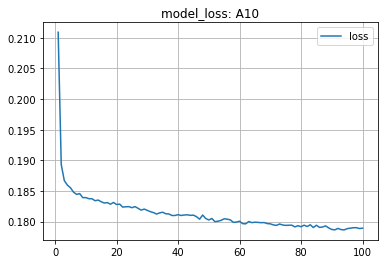

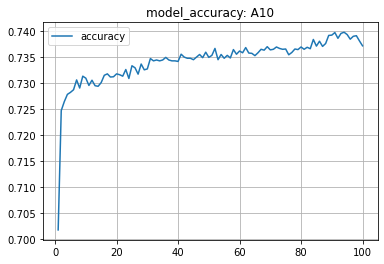

In [96]:
model_plot = pd.DataFrame(fit_model_A10.history, index=range(1, len(fit_model_A10.history["loss"]) + 1))
model_plot.plot(y="loss", grid=True, title="model_loss: A10")
model_plot.plot(y="accuracy", grid=True, title="model_accuracy: A10")

In [97]:
print("Alternative Model 11 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A11.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 11 Results
Loss: 0.18793749809265137, Accuracy: 0.18793749809265137


KeyError: 'accuracy'

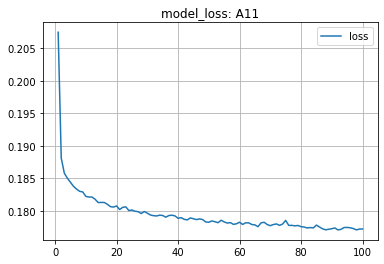

In [98]:
model_plot = pd.DataFrame(fit_model_A11.history, index=range(1, len(fit_model_A11.history["loss"]) + 1))
model_plot.plot(y="loss", grid=True, title="model_loss: A11")
model_plot.plot(y="accuracy", grid=True, title="model_accuracy: A11")

In [99]:
print("Alternative Model 12 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A12.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 12 Results
Loss: 0.18616177141666412, Accuracy: 0.7173485159873962


KeyError: 'accuracy'

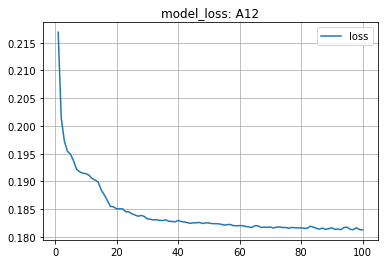

In [100]:
model_plot = pd.DataFrame(fit_model_A12.history, index=range(1, len(fit_model_A12.history["loss"]) + 1))
model_plot.plot(y="loss", grid=True, title="model_loss: A12")
model_plot.plot(y="accuracy", grid=True, title="model_accuracy: A12")

In [101]:
print("Alternative Model 13 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A13.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 13 Results
Loss: 0.1870238333940506, Accuracy: 0.8109299540519714


KeyError: 'accuracy'

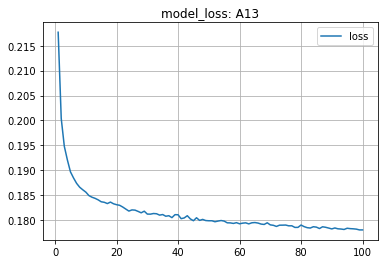

In [102]:
model_plot = pd.DataFrame(fit_model_A13.history, index=range(1, len(fit_model_A13.history["loss"]) + 1))
model_plot.plot(y="loss", grid=True, title="model_loss: A13")
model_plot.plot(y="accuracy", grid=True, title="model_accuracy: A13")

In [103]:
print("Alternative Model 14 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A14.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 14 Results
Loss: 0.18711206316947937, Accuracy: 0.7293294668197632


<AxesSubplot:title={'center':'model_accuracy: A14'}>

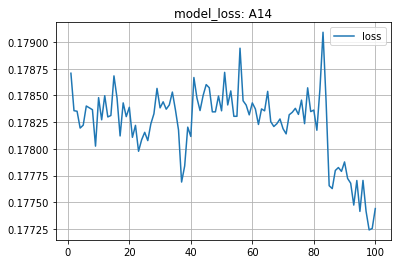

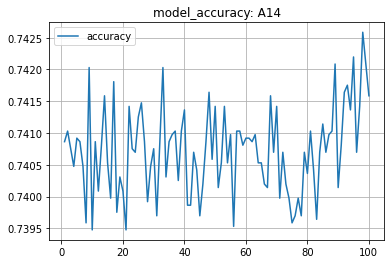

In [104]:
model_plot = pd.DataFrame(fit_model_A14.history, index=range(1, len(fit_model_A14.history["loss"]) + 1))
model_plot.plot(y="loss", title="model_loss: A14", grid=True)
model_plot.plot(y="accuracy", title="model_accuracy: A14", grid=True)

### Step 2(b): Plot and Compare the Results of each Alternative Model

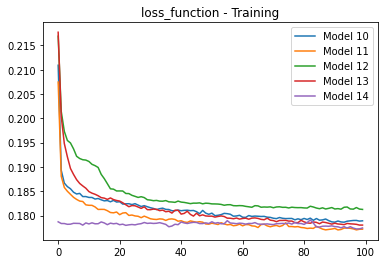

In [105]:
# Day 14-2 cell [62]
plt.plot(fit_model_A10.history["loss"])
plt.plot(fit_model_A11.history["loss"])
plt.plot(fit_model_A12.history["loss"])
plt.plot(fit_model_A13.history["loss"])
plt.plot(fit_model_A14.history["loss"])

plt.title("loss_function - Training")
plt.legend(["Model 10",
            "Model 11",
            "Model 12",
            "Model 13",
            "Model 14"
           ])
plt.show()

KeyError: 'accuracy'

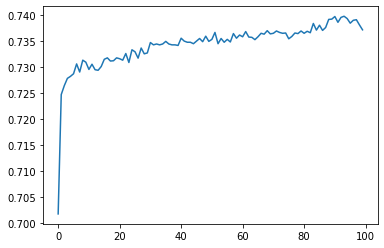

In [106]:
# Day 14-2 cell [62]
plt.plot(fit_model_A10.history["accuracy"])
plt.plot(fit_model_A11.history["accuracy"])
plt.plot(fit_model_A12.history["accuracy"])
plt.plot(fit_model_A13.history["accuracy"])
plt.plot(fit_model_A14.history["accuracy"])

plt.title("accuracy_function - Training")
plt.legend(["Model 10",
            "Model 11",
            "Model 12",
            "Model 13",
            "Model 14"
           ])
plt.show()

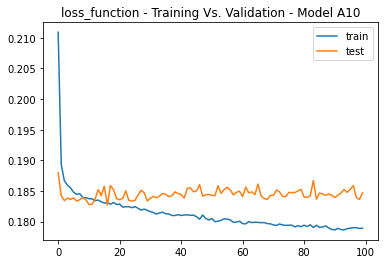

In [107]:
# Train vs test for shallow net
plt.plot(fit_model_A10.history["loss"])
plt.plot(fit_model_A10.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - Model A10")
plt.legend(["train", "test"])
plt.show()

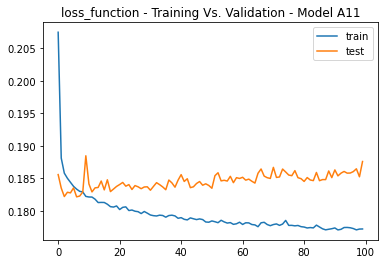

In [108]:
# Train vs test for deep net
plt.plot(fit_model_A11.history["loss"])
plt.plot(fit_model_A11.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - Model A11")
plt.legend(["train", "test"])
plt.show()

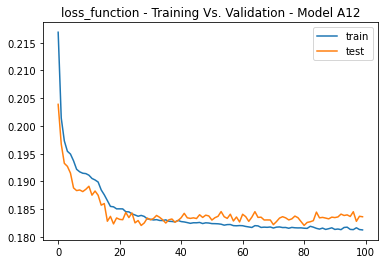

In [109]:
# Train vs test for deep net
plt.plot(fit_model_A12.history["loss"])
plt.plot(fit_model_A12.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - Model A12")
plt.legend(["train", "test"])
plt.show()

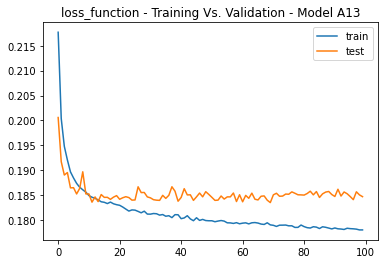

In [110]:
# Train vs test for deep net
plt.plot(fit_model_A13.history["loss"])
plt.plot(fit_model_A13.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - Model A13")
plt.legend(["train", "test"])
plt.show()

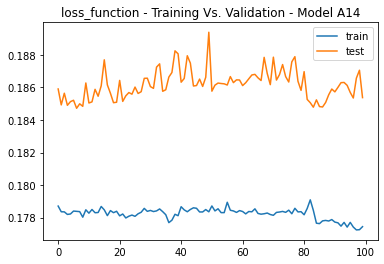

In [111]:
# Train vs test for deep net
plt.plot(fit_model_A14.history["loss"])
plt.plot(fit_model_A14.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - Model A14")
plt.legend(["train", "test"])
plt.show()

# ================================

### Step 3: Save each of your alternative models as an HDF5 file.


In [112]:
# Set the file path for the fifth alternative model
file_path = Path("./Resources/AlphabetSoup_A15.h5")
# Export your model to a HDF5 file
nn_A10.save(file_path)

In [113]:
# Set the file path for the sixth alternative model
file_path = Path("./Resources/AlphabetSoup_A16.h5")
# Export your model to a HDF5 file
nn_A11.save(file_path)

In [114]:
# Set the file path for the seventh alternative model
file_path = Path("./Resources/AlphabetSoup_A17.h5")
# Export your model to a HDF5 file
nn_A12.save(file_path)

In [115]:
# Set the file path for the eighth alternative model
file_path = Path("./Resources/AlphabetSoup_A18.h5")
# Export your model to a HDF5 file
nn_A13.save(file_path)

In [116]:
# Set the file path for the ninth alternative model
file_path = Path("./Resources/AlphabetSoup_A19.h5")
# Export your model to a HDF5 file
nn_A14.save(file_path)